### **Data** **Preparation**

In [4]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

In [5]:
def load_data():
  '''
  Reads the .pkl file and loads data into variables
  '''
  f = gzip.open('mnist.pkl.gz', 'rb')
  f.seek(0)
  training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
  f.close()
  return (training_data, validation_data, test_data)

In [8]:
training_data, validation_data, test_data = load_data()

In [9]:
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8]))

In [10]:
# Input and target label shapes
print(training_data[0].shape)
print(training_data[1].shape)

(50000, 784)
(50000,)


In [11]:
print("The feature dataset is:" + str(training_data[0]))
print("The target dataset is:" + str(training_data[1]))
print("The number of examples in the training dataset is:" + str(len(training_data[0])))
print("The number of points in a single input is:" + str(len(training_data[0][1])))

The feature dataset is:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The target dataset is:[5 0 4 ... 8 4 8]
The number of examples in the training dataset is:50000
The number of points in a single input is:784


### **One-Hot Representation**

In [12]:
def one_hot(j):
  '''
  Input: List of m labels
  Output: Returns (10, m) matrix with one-hot representation
  '''
  n = j.shape[0]
  new_array = np.zeros((10, n))
  index = 0
  for res in j:
      new_array[res][index] = 1.0
      index = index + 1
  return new_array

In [13]:
def data_wrapper():
  '''
  Converts the dataset into desired shape and also converts the ground truth to one-hot representation
  '''
  tr_d, va_d, te_d = load_data()
  training_inputs = np.array(tr_d[0][:]).T
  training_results = np.array(tr_d[1][:])
  train_set_y = one_hot(training_results)
  
  validation_inputs = np.array(va_d[0][:]).T
  validation_results = np.array(va_d[1][:])
  validation_set_y = one_hot(validation_results)
  
  test_inputs = np.array(te_d[0][:]).T
  test_results = np.array(te_d[1][:])
  test_set_y = one_hot(test_results)
  
  return (training_inputs, train_set_y, test_inputs, test_set_y)

In [14]:
train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [15]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (784, 50000)
train_set_y shape: (10, 50000)
test_set_x shape: (784, 10000)
test_set_y shape: (10, 10000)


In [16]:
# Converting labels into dataframe.
y = pd.DataFrame(train_set_y)

In [17]:
print("The target dataset is:" + str(training_data[1]))
print("The one hot encoding dataset is:")
y

The target dataset is:[5 0 4 ... 8 4 8]
The one hot encoding dataset is:


,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


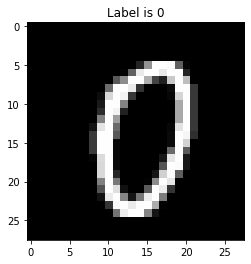

In [18]:
# Visualizing a random training sample.
index  = 1000
k = train_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label= training_data[1][index]))
plt.imshow(k, cmap='gray')

### **Feedforward**

Activation Functions

In [19]:
def sigmoid(Z):
  '''
  Input: Z is the cummulation input to the layer
  Output: Returns  sigmoid activation H matrix, sigmoid_memory later used in the backpropogation.
  '''
   
  H = 1/(1+np.exp(-Z))
  sigmoid_memory = Z
  
  return H, sigmoid_memory

In [20]:
Z = np.arange(8).reshape(4,2)
print ("sigmoid(Z) = " + str(sigmoid(Z)))

sigmoid(Z) = (array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895]]), array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]]))


In [21]:
def relu(Z):
  '''
  Input: Z is the cummulation input to the layer
  Output: Returns relu activation H matrix, relu_memory later used in the backpropogation.
  '''

  H = np.maximum(0,Z)
  assert(H.shape == Z.shape)
  
  relu_memory = Z 
  return H, relu_memory

In [22]:
Z = np.array([1, 3, -1, -4, -5, 7, 9, 18]).reshape(4,2)
print ("relu(Z) = " + str(relu(Z)))

relu(Z) = (array([[ 1,  3],
       [ 0,  0],
       [ 0,  7],
       [ 9, 18]]), array([[ 1,  3],
       [-1, -4],
       [-5,  7],
       [ 9, 18]]))


In [23]:
def softmax(Z):
  '''
  Input: Z is the cummulation input to the layer
  Output: Returns softmax activation H matrix, softmax_memory later used in the backpropogation.
  '''
  Z_exp = np.exp(Z)

  Z_sum = np.sum(Z_exp,axis = 0, keepdims = True)
  
  H = Z_exp/Z_sum  #normalising step
  softmax_memory = Z
  
  return H, softmax_memory

In [24]:
Z = np.array([[11,19,10], [12, 21, 23]])
H, softmax_memory = softmax(Z)
print(H)
print(softmax_memory)

[[2.68941421e-01 1.19202922e-01 2.26032430e-06]
 [7.31058579e-01 8.80797078e-01 9.99997740e-01]]
[[11 19 10]
 [12 21 23]]


### **Initializing Parameters**

In [25]:
def initialize_parameters(dimensions):
  '''
  Input: dimensions is a list containing the number of neuron in each layer in the network
  Output: Returns parameters which is a python dictionary containing the parameters "W1", "b1", ..., "WL", "bL"
  '''
  np.random.seed(2)
  parameters = {}
  L = len(dimensions)            # number of layers in the network + 1

  for l in range(1, L): 
      parameters['W' + str(l)] = np.random.randn(dimensions[l], dimensions[l-1]) * 0.1
      parameters['b' + str(l)] = np.zeros((dimensions[l], 1)) 
      
      assert(parameters['W' + str(l)].shape == (dimensions[l], dimensions[l-1]))
      assert(parameters['b' + str(l)].shape == (dimensions[l], 1))

  return parameters

In [26]:
dimensions  = [784, 3,7,10]
parameters = initialize_parameters(dimensions)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
# print("W3 = " + str(parameters["W3"]))
# print("b3 = " + str(parameters["b3"]))

W1 = [[-0.04167578 -0.00562668 -0.21361961 ... -0.06168445  0.03213358
  -0.09464469]
 [-0.05301394 -0.1259207   0.16775441 ... -0.03284246 -0.05623108
   0.01179136]
 [ 0.07386378 -0.15872956  0.01532001 ... -0.08428557  0.10040469
   0.00545832]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[ 0.06650944 -0.19626047  0.2112715 ]
 [-0.28074571 -0.13967752  0.02641189]
 [ 0.10925169  0.06646016  0.08565535]
 [-0.11058228  0.03715795  0.13440124]
 [-0.16421272 -0.1153127   0.02013163]
 [ 0.13985659  0.07228733 -0.10717236]
 [-0.05673344 -0.03663499 -0.15460347]]
b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## **Forward Pass**

In [27]:
# This performs one forward propogation for a certain layer 'l'
def layer_forward(H_prev, W, b, activation = 'relu'): 
  '''
  Input: H_prev this is the input cummulative to the current layer, W is weights matrix of shape
  b is bias vector of shape, activation to be used for forward propagation : "softmax", "relu", "sigmoid"
  Output: Returns H is the output of the activation function, memory is a python dictionary containing linear or activation memory.
  '''
  
  Z = np.dot(W, H_prev) + b
  if activation == "sigmoid":
      linear_memory = (H_prev, W, b)
      H, activation_memory = sigmoid(Z)

  elif activation == "softmax":
      linear_memory = (H_prev, W, b)
      H, activation_memory = softmax(Z)
  
  elif activation == "relu":
      linear_memory = (H_prev, W, b)
      H, activation_memory = relu(Z)
      
  assert (H.shape == (W.shape[0], H_prev.shape[1]))
  memory = (linear_memory, activation_memory)

  return H, memory

In [28]:
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

H = layer_forward(H_prev, W_sample, b_sample, activation="sigmoid")[0]
H

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99908895, 0.99330715, 0.99999969, 1.        , 0.99987661],
       [0.73105858, 0.5       , 0.99330715, 0.9999546 , 0.88079708]])

In [29]:
#This performs one forward pass through the whole network for all training samples.

def L_layer_forward(X, parameters):
  '''
  Input: X is input data, parameters is output of initialize_parameters()
  Output: HL is the last layer's post-activation value, memories is the list of memory containing 
  -every memory of relu forward (there are L-1 of them, indexed from 1 to L-1), 
  - the memory of softmax forward (there is one, indexed L)
  '''

  memories = []
  H = X
  L = len(parameters) // 2   # number of layers in the neural network
  
  for l in range(1, L):
      H_prev = H
      W=parameters["W"+str(l)]
      b=parameters["b"+str(l)]
      H, memory = layer_forward(H_prev, W, b, activation = 'relu')
      
      memories.append(memory)
  # HL here is the final prediction in the final layer.
  W=parameters["W"+str(L)]
  b=parameters["b"+str(L)]
  HL, memory = layer_forward(H, W, b, activation = 'softmax')
  
  memories.append(memory)

  assert(HL.shape == (10, X.shape[1]))
          
  return HL, memories

In [30]:
# verify
# X is (784, 10)
# HL should be (10, 10)
x_sample = train_set_x[:, 10:20]
print(x_sample.shape)
HL = L_layer_forward(x_sample, parameters=parameters)[0]
print(HL[:, :5])

(784, 10)
[[0.10106734 0.10045152 0.09927757 0.10216656 0.1       ]
 [0.10567625 0.10230873 0.10170271 0.11250099 0.1       ]
 [0.09824287 0.0992886  0.09967128 0.09609693 0.1       ]
 [0.10028288 0.10013048 0.09998149 0.10046076 0.1       ]
 [0.09883601 0.09953443 0.09931419 0.097355   0.1       ]
 [0.10668575 0.10270912 0.10180736 0.11483609 0.1       ]
 [0.09832513 0.09932275 0.09954792 0.09627089 0.1       ]
 [0.09747092 0.09896735 0.0995387  0.09447277 0.1       ]
 [0.09489069 0.09788255 0.09929998 0.08915178 0.1       ]
 [0.09852217 0.09940447 0.09985881 0.09668824 0.1       ]]


### **Loss**

In [31]:
# Cross entropy loss
def compute_loss(HL, Y):
  '''
  Input: HL is the output probability from the network, Y is the true labels
  Output: Cross-entropy loss
  '''
  m = Y.shape[1]
  loss = -(1./m)*np.sum(np.multiply(Y,np.log(HL)))
  
  loss = np.squeeze(loss) # To make sure that the loss's shape is what we expect (e.g. this turns [[17]] into 17).
  assert(loss.shape == ())
  
  return loss

In [33]:
# sample

np.random.seed(2)
HL_sample = np.random.rand(10,5)
Y_sample = train_set_y[:, 10:15]
print(HL_sample)
print(Y_sample)

print(compute_loss(HL_sample, Y_sample))

[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]
 [0.59674531 0.226012   0.10694568 0.22030621 0.34982629]
 [0.46778748 0.20174323 0.64040673 0.48306984 0.50523672]
 [0.38689265 0.79363745 0.58000418 0.1622986  0.70075235]
 [0.96455108 0.50000836 0.88952006 0.34161365 0.56714413]
 [0.42754596 0.43674726 0.77655918 0.53560417 0.95374223]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.8964600261334037


In [36]:
# Cross entropy loss with L2 regularization
def compute_loss_with_L2(HL, Y, parameters, lambdax):
  '''
  Input: HL is the output probability from the network, Y is the true labels
  Output: Cross-entropy loss
  '''

  L = len(parameters) // 2   # Number of layers

  m = Y.shape[1]
  loss = -(1./m)*np.sum(np.multiply(Y,np.log(HL)))
  total_sum  =0
  for l in range(1, L):
    total_sum += np.sum(np.square(parameters["W"+str(l)]))
  L2_regularization_cost = (lambdax/(2*m))*total_sum
  # L2_regularization_cost = (lambdax/(2*m))*(np.sum(np.square(W1) + np.sum(np.square(W2) + np.sum(np.square(W2)))
  # print("L2 loss before ", L2_regularization_cost)
  loss = loss + L2_regularization_cost
  loss = np.squeeze(loss) # To make sure that the loss's shape is what we expect (e.g. this turns [[17]] into 17).
  assert(loss.shape == ())
  
  return loss

In [37]:
# sample

np.random.seed(2)
HL_sample = np.random.rand(10,5)
Y_sample = train_set_y[:, 10:15]
print(HL_sample)
print(Y_sample)

print(compute_loss_with_L2(HL_sample, Y_sample, parameters, 0.7))

[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]
 [0.59674531 0.226012   0.10694568 0.22030621 0.34982629]
 [0.46778748 0.20174323 0.64040673 0.48306984 0.50523672]
 [0.38689265 0.79363745 0.58000418 0.1622986  0.70075235]
 [0.96455108 0.50000836 0.88952006 0.34161365 0.56714413]
 [0.42754596 0.43674726 0.77655918 0.53560417 0.95374223]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
2.5432468864562114


### **BackPropogation**

 **sigmoid-backward & relu-backward**

In [38]:
# Backpropogation fo the sigmoid function
def sigmoid_backward(dH, sigmoid_memory):
  '''
  Input: dH is gradient of the sigmoid activated activation of shape same as H or Z in the same layer,
  sigmoid_memory is the memory stored in the sigmoid(Z) calculation.
  Output: Returns derivate of Loss w.r.t Z
  '''
  # sigmoid_memory is the memory stored in the sigmoid(Z) calculation
  
  Z = sigmoid_memory
  
  H = 1/(1+np.exp(-Z))
  dZ = dH * H * (1-H)
  
  assert (dZ.shape == Z.shape)
  
  return dZ

In [39]:
# Backpropogation fo the sigmoid function
def relu_backward(dH, relu_memory):
  '''
  Input: dH is gradient of the relu activated activation of shape same as H or Z in the same layer,
  relu_memory is the memory stored in the relu(Z) calculation.
  Output: Returns derivate of Loss w.r.t Z
  '''

  Z = relu_memory
  dZ = np.array(dH, copy=True) # dZ will be the same as dA wherever the elements of A weren't 0
  
  dZ[Z <= 0] = 0
  
  assert (dZ.shape == Z.shape)
  
  return dZ

In [40]:
#Graded

def layer_backward(dH, memory, activation = 'relu'):
  '''
  Input: takes dH and the memory calculated in layer_forward and activation
  Output: Returns to calculate the dH_prev, dW, db
  '''


  linear_memory, activation_memory = memory
  
  if activation == "relu":
      dZ = relu_backward(dH,activation_memory)
      H_prev, W, b = linear_memory
      m = H_prev.shape[1]
      dW = (1./m) * np.dot(dZ,H_prev.transpose())
      db = (1./m) * np.sum(dZ,axis=1)
      db = np.reshape(db,(-1, 1))
      dH_prev = np.dot(W.transpose(),dZ)
      
  elif activation == "sigmoid":
      dZ = sigmoid_backward(dH, activation_memory)
      H_prev, W, b = linear_memory
      m = H_prev.shape[1]
      dW = (1./m) * np.dot(dZ,H_prev.transpose())
      db = (1./m) * np.sum(dZ,axis=1)
      db = np.reshape(db,(-1, 1))
      dH_prev = np.dot(W.transpose(),dZ)
  
  return dH_prev, dW, db

In [41]:
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

H, memory = layer_forward(H_prev, W_sample, b_sample, activation="relu")
np.random.seed(2)
dH = np.random.rand(3,5)
dH_prev, dW, db = layer_backward(dH, memory, activation = 'relu')
print('dH_prev is \n' , dH_prev)
print('dW is \n' ,dW)
print('db is \n', db)

dH_prev is 
 [[5.6417525  0.66855959 6.86974666 5.46611139 4.92177244]
 [2.17997451 0.12963116 2.74831239 2.17661196 2.10183901]]
dW is 
 [[1.67565336 1.56891359]
 [1.39137819 1.4143854 ]
 [1.3597389  1.43013369]]
db is 
 [[0.37345476]
 [0.34414727]
 [0.29074635]]


In [42]:
def L_layer_backward(HL, Y, memories):
  '''
  Input: predicted value HL and the true target value Y and memories calculated by L_layer_forward
  Output: Returns gradient.
  '''

  gradients = {}
  L = len(memories) # the number of layers
  m = HL.shape[1]
  Y = Y.reshape(HL.shape) # after this line, Y is the same shape as AL
  
  # Perform the backprop for the last layer that is the softmax layer
  current_memory = memories[-1]
  linear_memory, activation_memory = current_memory
  dZ = HL - Y
  H_prev, W, b = linear_memory
  
  gradients["dH" + str(L-1)] = np.dot(W.transpose(),dZ)
  gradients["dW" + str(L)] = (1./m) * np.dot(dZ,H_prev.transpose())
  db = (1./m) * np.sum(dZ,axis=1)
  db = np.reshape(db,(-1, 1))
  gradients["db" + str(L)] = db
  
  # Perform the backpropagation l-1 times
  for l in reversed(range(L-1)):
      # Lth layer gradients: "gradients["dH" + str(l + 1)] ", gradients["dW" + str(l + 2)] , gradients["db" + str(l + 2)]
      current_memory = memories[l]
      
      dH_prev_temp, dW_temp, db_temp = layer_backward(gradients["dH" + str(l + 1)], current_memory, activation = 'relu')
      gradients["dH" + str(l)] = dH_prev_temp
      gradients["dW" + str(l + 1)] = dW_temp
      gradients["db" + str(l + 1)] = db_temp


  return gradients

In [59]:
def L_layer_backward_with_L2(HL, Y, memories, lambdax):
  '''
  Input: predicted value HL and the true target value Y and memories calculated by L_layer_forward
  Output: Returns gradient.
  '''

  gradients = {}
  L = len(memories) # the number of layers
  m = HL.shape[1]
  Y = Y.reshape(HL.shape) # after this line, Y is the same shape as AL
  
  # Perform the backprop for the last layer that is the softmax layer
  current_memory = memories[-1]
  linear_memory, activation_memory = current_memory
  dZ = HL - Y
  H_prev, W, b = linear_memory
  
  gradients["dH" + str(L-1)] = np.dot(W.transpose(),dZ)
  gradients["dW" + str(L)] = (1./m) * np.dot(dZ,H_prev.transpose())
  gradients["dW" + str(L)] += (lambdax * gradients["dW" + str(L)])/m
  db = (1./m) * np.sum(dZ,axis=1)
  db = np.reshape(db,(-1, 1))
  gradients["db" + str(L)] = db
  
  # Perform the backpropagation l-1 times
  for l in reversed(range(L-1)):
      # Lth layer gradients: "gradients["dH" + str(l + 1)] ", gradients["dW" + str(l + 2)] , gradients["db" + str(l + 2)]
      current_memory = memories[l]
      
      dH_prev_temp, dW_temp, db_temp = layer_backward(gradients["dH" + str(l + 1)], current_memory, activation = 'relu')
      gradients["dH" + str(l)] = dH_prev_temp
      gradients["dW" + str(l + 1)] = dW_temp
      # print("checking shape:",(lambdax * gradients["dW" + str(l+1)])/m)
      gradients["dW" + str(l + 1)] += (lambdax * gradients["dW" + str(l+1)])/m
      gradients["db" + str(l + 1)] = db_temp


  return gradients

In [60]:
x_sample = train_set_x[:, 10:20]
y_sample = train_set_y[:, 10:20]

HL, memories = L_layer_forward(x_sample, parameters=parameters)
gradients  = L_layer_backward_with_L2(HL, y_sample, memories, 0.7)
print('dW3 is \n', gradients['dW3'])
print('db3 is \n', gradients['db3'])
print('dW2 is \n', gradients['dW2'])
print('db2 is \n', gradients['db2'])

dW3 is 
 [[ 0.0214396   0.00203761  0.0108255   0.015596    0.00156695  0.00064053
   0.        ]
 [ 0.02305365  0.00217765  0.01161644  0.0167677   0.00167422  0.0006477
   0.        ]
 [-0.01838696 -0.00292871 -0.00534038 -0.00975984 -0.00221881  0.00064196
   0.        ]
 [-0.01221403 -0.00169725 -0.00649543 -0.00989439 -0.00127992  0.00064608
   0.        ]
 [ 0.02079195  0.00197105  0.01053461  0.01515513  0.00151594  0.0006386
   0.        ]
 [ 0.01118628  0.00068452  0.00682254  0.00923737  0.00053626  0.00064672
   0.        ]
 [-0.06782635 -0.00799559 -0.02591208 -0.04104208 -0.0062181   0.00064564
   0.        ]
 [ 0.02045169  0.00193135  0.00752318  0.01290805  0.00148554 -0.00150372
   0.        ]
 [-0.01927716  0.0018572  -0.01593474 -0.02167901  0.00142875  0.00064482
   0.        ]
 [ 0.02078132  0.00196217  0.00636036  0.01271105  0.00150916 -0.00364833
   0.        ]]
db3 is 
 [[ 0.10031756]
 [ 0.00460183]
 [-0.00142942]
 [-0.0997827 ]
 [ 0.09872663]
 [ 0.00536378]
 [-

### **Update Parameters**

In [45]:
def update_parameters(parameters, gradients, learning_rate):
  '''
  Input: Takes in all the parameters, gradients and learning rate
  Output: Returns the updated parameters.
  '''
  L = len(parameters) // 2 # number of layers in the neural network
  for l in range(L):
      parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * gradients["dW" + str(l+1)]
      parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * gradients["db" + str(l+1)]
  
  return parameters

In [46]:
dimensions = [784, 45, 10] #  three-layer model

### **Model**

In [47]:
def L_layer_model(X, Y, dimensions, learning_rate = 0.0075, num_iterations = 3000, print_loss=False):
  '''
  Input: X and Y are the input training datasets, learning_rate, num_iterations are for gradient descent optimization.
  Output: Returns the optimized parameters.
  '''
  np.random.seed(2)
  losses = []# keep track of loss
  
  # Parameters initialization
  parameters = initialize_parameters(dimensions)

  for i in range(0, num_iterations):

      # Forward propagation
      HL, memories = L_layer_forward(X, parameters)
      
      # Compute loss
      loss = compute_loss(HL, Y)
  
      # Backward propagation
      gradients = L_layer_backward(HL, Y, memories)

      # Update parameters.
      parameters = update_parameters(parameters, gradients, learning_rate)
      
      # Printing the loss every 100 training example
      if print_loss and i % 100 == 0:
          print ("Loss after iteration %i: %f" %(i, loss))
          losses.append(loss)
          
  # plotting the loss
  plt.plot(np.squeeze(losses))
  plt.ylabel('loss')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
  
  return parameters

In [50]:
train_set_x_new = train_set_x[:,0:5000]
train_set_y_new = train_set_y[:,0:5000]
train_set_x_new.shape

(784, 5000)

Loss after iteration 0: 2.422624
Loss after iteration 100: 2.129232
Loss after iteration 200: 1.876095
Loss after iteration 300: 1.604213
Loss after iteration 400: 1.350205
Loss after iteration 500: 1.144823
Loss after iteration 600: 0.990554
Loss after iteration 700: 0.876603
Loss after iteration 800: 0.791154
Loss after iteration 900: 0.725441
Loss after iteration 1000: 0.673485
Loss after iteration 1100: 0.631386
Loss after iteration 1200: 0.596598
Loss after iteration 1300: 0.567342
Loss after iteration 1400: 0.542346
Loss after iteration 1500: 0.520746
Loss after iteration 1600: 0.501865
Loss after iteration 1700: 0.485205
Loss after iteration 1800: 0.470368
Loss after iteration 1900: 0.457054


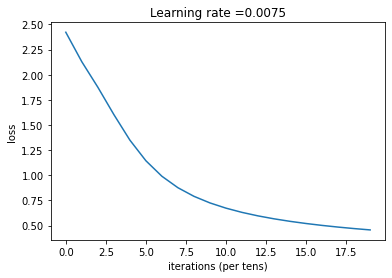

In [44]:
parameters = L_layer_model(train_set_x_new, train_set_y_new, dimensions, num_iterations = 2000, print_loss = True)

In [61]:
def L_layer_model_L2_regularization(X, Y, dimensions, learning_rate = 0.0075, num_iterations = 3000, print_loss=False, lambdax = 0):
  '''
  Input: X and Y are the input training datasets, learning_rate, num_iterations are for gradient descent optimization.
  Output: Returns the optimized parameters.
  '''
  np.random.seed(2)
  losses = []# keep track of loss
  
  # Parameters initialization
  parameters = initialize_parameters(dimensions)

  for i in range(0, num_iterations):

      # Forward propagation
      HL, memories = L_layer_forward(X, parameters)
      
      # Compute loss
      loss = compute_loss_with_L2(HL, Y, parameters, lambdax)
  
      # Backward propagation
      gradients = L_layer_backward_with_L2(HL, Y, memories, lambdax)

      # Update parameters.
      parameters = update_parameters(parameters, gradients, learning_rate)
      
      # Printing the loss every 100 training example
      if print_loss and i % 100 == 0:
          print ("Loss after iteration %i: %f" %(i, loss))
          losses.append(loss)
          
  # plotting the loss
  plt.plot(np.squeeze(losses))
  plt.ylabel('loss')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
  
  return parameters

Loss after iteration 0: 2.447456
Loss after iteration 100: 2.154030
Loss after iteration 200: 1.900876
Loss after iteration 300: 1.629002
Loss after iteration 400: 1.375035
Loss after iteration 500: 1.169724
Loss after iteration 600: 1.015534
Loss after iteration 700: 0.901658
Loss after iteration 800: 0.816278
Loss after iteration 900: 0.750627
Loss after iteration 1000: 0.698728
Loss after iteration 1100: 0.656680
Loss after iteration 1200: 0.621938
Loss after iteration 1300: 0.592725
Loss after iteration 1400: 0.567769
Loss after iteration 1500: 0.546205
Loss after iteration 1600: 0.527359
Loss after iteration 1700: 0.510731
Loss after iteration 1800: 0.495926
Loss after iteration 1900: 0.482640


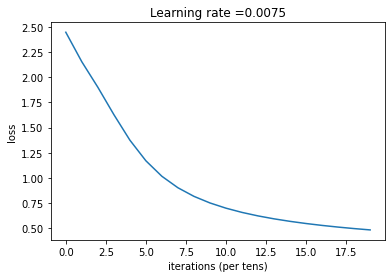

In [62]:
parameters = L_layer_model_L2_regularization(train_set_x_new, train_set_y_new, dimensions, num_iterations = 2000, print_loss = True, lambdax = 0.7)

In [45]:
def predict(X, y, parameters):
  '''
  Input: Input data X, y, optimized parameters
  Output: returns the predicitons
  '''
  m = X.shape[1]
  n = len(parameters) // 2 # number of layers in the neural network
  
  # Forward propagation
  probas, caches = L_layer_forward(X, parameters)
  
  p = np.argmax(probas, axis = 0)
  act = np.argmax(y, axis = 0)

  print("Accuracy: "  + str(np.sum((p == act)/m)))
      
  return p

In [46]:
# Train set predictions
pred_train = predict(train_set_x_new, train_set_y_new, parameters)

Accuracy: 0.8774000000000002


In [47]:
# Test set predicitons
pred_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.8674000000000002


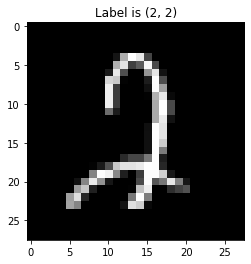

In [48]:
# Visualizing the true labels Images and prediction
index  = 3474
k = test_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label=(pred_test[index], np.argmax(test_set_y, axis = 0)[index])))
plt.imshow(k, cmap='gray')